# TED TALKS
------------------------------------------------------------------------------------------------------------------------------------------------------------------

Intrduction: 

The following data set is about the talks from 1972 to 2017. It describes who gives the talk, the duration of the talk, the year, topic and the comments of the users, etc.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [72]:
ted = pd.read_csv('ted.csv')

In [73]:
ted.shape

(2550, 17)

In [74]:
ted.isnull().sum() ##datos que estan vacios en el datset

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [75]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [76]:
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [77]:
ted.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Most popular Ted Talks 

In [78]:
top_5 = ted[['title', 'main_speaker', 'views', 'film_date', 'duration']].sort_values('views', ascending=False)[:15]
top_5

,title,main_speaker,views,film_date,duration
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006,1164
1346,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012,1262
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009,1084
837,The power of vulnerability,Brené Brown,31168150,05-06-2010,1219
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009,1003
1776,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013,598
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008,1099
5,Why we do what we do,Tony Robbins,20685401,01-02-2006,1305
2114,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015,588
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012,577


#### Number of visits that got our top 5

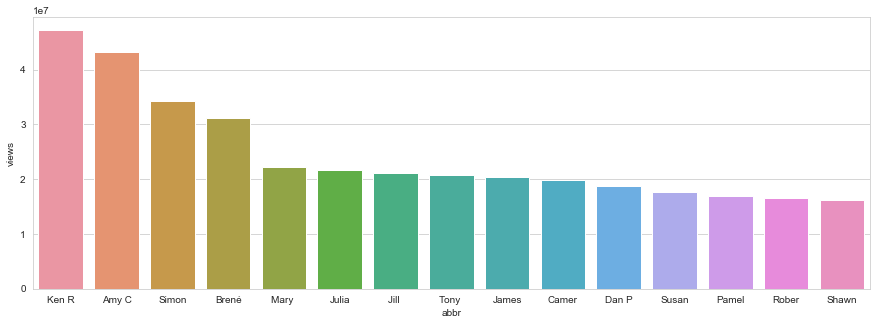

In [79]:
sns.color_palette()
top_5['abbr'] = top_5['main_speaker'].apply(lambda x: x[:5]) ##quiero que mis nombres tengan 5 letras
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.barplot(x='abbr', y='views', data= top_5) 

### Comments in the talks

In [80]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

- On average, there are 191.5 comments in ech talk
- The minimum number of comments on a talk is 2.
- The maximum is 6404. 

### Number of views is correlated with the number of comments

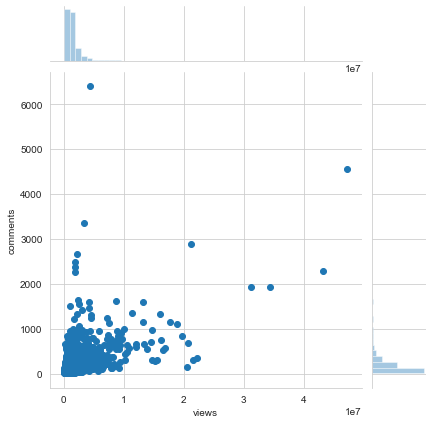

In [81]:
sns.jointplot(x='views', y='comments', data=ted)

In [82]:
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


### Number of views and comments on the top 5 commented TED Talks.

In [83]:
ted[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(5)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673


### Talks tend to have controversy depending of...

In [84]:
ted['discu'] = ted['comments']/ted['views'] ##relación entre comentarios y visitas 
ted[['title', 'main_speaker','views', 'comments', 'discu', 'film_date']].sort_values('discu', ascending=False).head(5)

,title,main_speaker,views,comments,discu,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,01-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,13-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,01-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,09-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,02-03-2011


- We can that in this top there is a real controversy on issues of Faith and Religion.
- The most discussed is the case of marriage between people of the same sex, (I investigated and the chara has like religious dyes xd)

### TED talks through the years

In [85]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year = pd.DataFrame(ted['year'].value_counts().reset_index())
year.columns = ['year', 'talks']

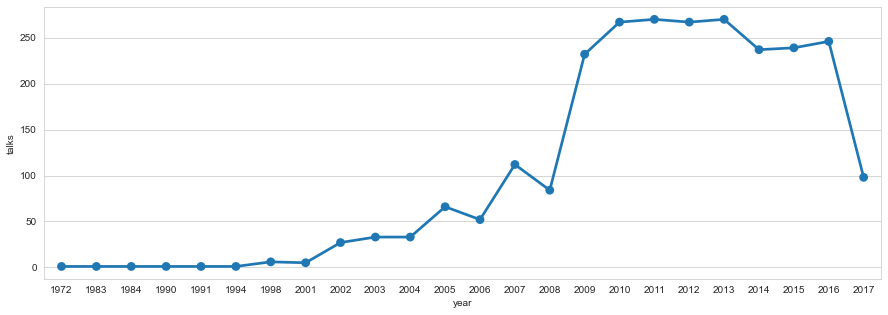

In [86]:
plt.figure(figsize=(15,5))
sns.pointplot(x='year', y='talks', data=year)

- The number of talks has gradually increased since 1984.
- Increase in the number of conversations in 2009.

### Speaker with the most appearances

In [87]:
speaker= ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker.columns = ['main_speaker', 'appearances']
speaker = speaker.sort_values('appearances', ascending=False)
speaker.head(5)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5


### Occupation of peakers

In [88]:
occup = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occup.columns = ['occupation', 'appearances']
occup = occup.sort_values('appearances', ascending=False)

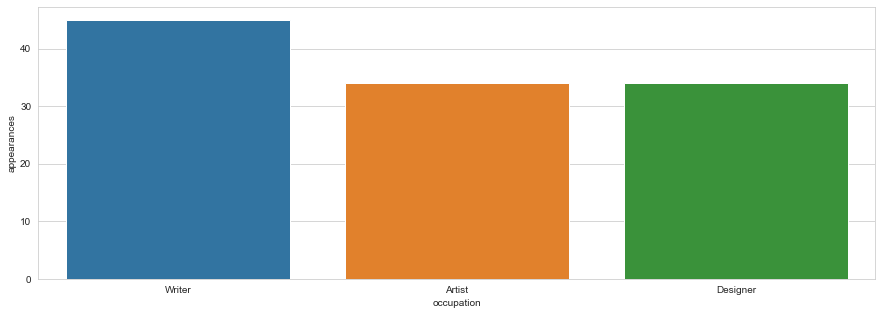

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occup.head(3))
plt.show()

### Most successful Ted talk event

In [90]:
event = ted[['title', 'event']].groupby('event').count().reset_index()
event.columns = ['event', 'talks']
event = event.sort_values('talks', ascending=False)
event.head(5)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75


### Topics in Ted talk

In [91]:
import ast
ted['tags'] = ted['tags'].apply(lambda x: ast.literal_eval(x)) ###Python AST module allows us to interact with Python code itself and modify it.

In [92]:
x = ted.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
x.name = 'topic'

In [93]:
topic = ted.drop('tags', axis=1).join(x)
topic.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,discu,year,topic
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,education


In [94]:
top_topic = pd.DataFrame(topic['topic'].value_counts()).reset_index()
top_topic.columns = ['topic', 'talks']
top_topic.head(5)

,topic,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450


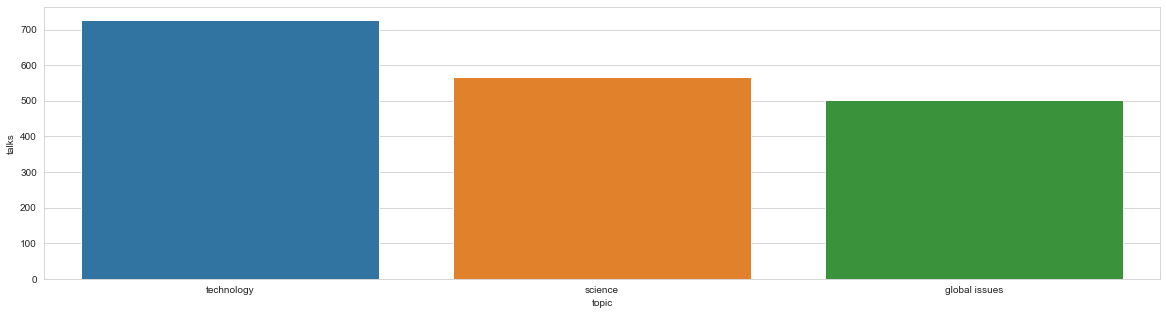

In [95]:
plt.figure(figsize=(20,5))
sns.barplot(x='topic', y='talks', data=top_topic.head(3))
plt.show()

### Duration of a ted talk

In [96]:
ted['duration'] = ted['duration']/60
ted['duration'].describe() ##curva de distrib del tiempo 

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

- TED talks, on average, last 13.7 minutes.
- The shortest TED talk recorded is 2.25 minutes
- The longest talk is 87.6 minutes.

In [97]:
ted[ted['duration'] == 87.6]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,discu,year
640,101,"Blind river dolphins, reclusive lemurs, a parr...",87.6,University of California,15-05-2001,0,Douglas Adams,"Douglas Adams: Parrots, the universe and every...",1,16-03-2010,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...","Author, satirist","[biodiversity, biology, comedy, humor, life, r...","Parrots, the universe and everything",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213,2001


In [98]:
ted[ted['duration'] == 2.25]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,discu,year
239,76,After speaking at TED2007 on elegance in physi...,2.25,TED2007,02-03-2007,61,Murray Gell-Mann,Murray Gell-Mann: The ancestor of language,1,10-06-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"[culture, global issues, history, language, ph...",The ancestor of language,https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097,2007


### Rating 

In [99]:
for i in ted['ratings'][0:3]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")

Value: [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
Type: <class 'str'>


Value: [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name':

In [30]:
ted["ratings"] = ted["ratings"].apply(lambda x: ast.literal_eval(x)) ##pasarlo a lista

In [31]:
for i in ted['ratings'][0:3]:
    print("Value: {}".format(i))
    print("Type: {}".format(type(i)))
    print("\n")

Value: [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
Type: <class 'list'>


Value: [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name'